# Decision Tree and Random Forest

## Business Understanding

### Initial Setups

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
#Read data from csv file
data = pd.read_csv('cs_05.csv')
data.head()

,Name,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


In [3]:
data.shape

(322, 21)

## Data Understanding

#### 1: Understand data collection process

Hitters data set:

Major League Baseball Data from the 1986 and 1987 seasons

#### 2: Document data set description (meta data)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       322 non-null    object 
 1   AtBat      322 non-null    int64  
 2   Hits       322 non-null    int64  
 3   HmRun      322 non-null    int64  
 4   Runs       322 non-null    int64  
 5   RBI        322 non-null    int64  
 6   Walks      322 non-null    int64  
 7   Years      322 non-null    int64  
 8   CAtBat     322 non-null    int64  
 9   CHits      322 non-null    int64  
 10  CHmRun     322 non-null    int64  
 11  CRuns      322 non-null    int64  
 12  CRBI       322 non-null    int64  
 13  CWalks     322 non-null    int64  
 14  League     322 non-null    object 
 15  Division   322 non-null    object 
 16  PutOuts    322 non-null    int64  
 17  Assists    322 non-null    int64  
 18  Errors     322 non-null    int64  
 19  Salary     263 non-null    float64
 20  NewLeague 

0 Name: Player's name 

1 AtBat: Number of times at bat in 1986 (numeric)

2 Hits: Number of hits in 1986 (numeric)

3 HmRun: Number of home runs in 1986 (numeric)

4 Runs: Number of runs in 1986 (numeric)

5 RBI: Number of runs batted in in 1986 (numeric)

6 Walks: Number of walks in 1986 (numeric)

7 Years: Number of years in the major leagues (numeric)

8 CAtBat: Number of times at bat during his career (numeric)

9 CHits: Number of hits during his career (numeric)

10 CHmRun: Number of home runs during his career (numeric)

11 CRuns: Number of runs during his career (numeric)

12 CRBI: Number of runs batted in during his career (numeric)

13 CWalks: Number of walks during his career (numeric)

14 League: A factor with levels A and N indicating player's league at the end of 1986 (nominal)

15 Division: A factor with levels E and W indicating player's division at the end of 1986 (nominal)

16 PutOuts: Number of put outs in 1986 (numeric)

17 Assists: Number of assists in 1986 (numeric)

18 Errors: Number of errors in 1986 (numeric)

19 Salary: 1987 annual salary on opening day in thousands of dollars (numeric)

20 NewLeague: A factor with levels A and N indicating player's league at the beginning of 1987 (nominal)

#### 3: Check for missing values

In [5]:
np.sum(data.isnull())

Name          0
AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [6]:
data['is_salary_missed'] = data['Salary'].isnull()
data.head()

,Name,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague,is_salary_missed
0,Andy Allanson,293,66,1,30,29,14,1,293,66,...,29,14,A,E,446,33,20,NaN,A,True
1,Alan Ashby,315,81,7,24,38,39,14,3449,835,...,414,375,N,W,632,43,10,475.0,N,False
2,Alvin Davis,479,130,18,66,72,76,3,1624,457,...,266,263,A,W,880,82,14,480.0,A,False
3,Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,838,354,N,E,200,11,3,500.0,N,False
4,Andres Galarraga,321,87,10,39,42,30,2,396,101,...,46,33,N,E,805,40,4,91.5,N,False


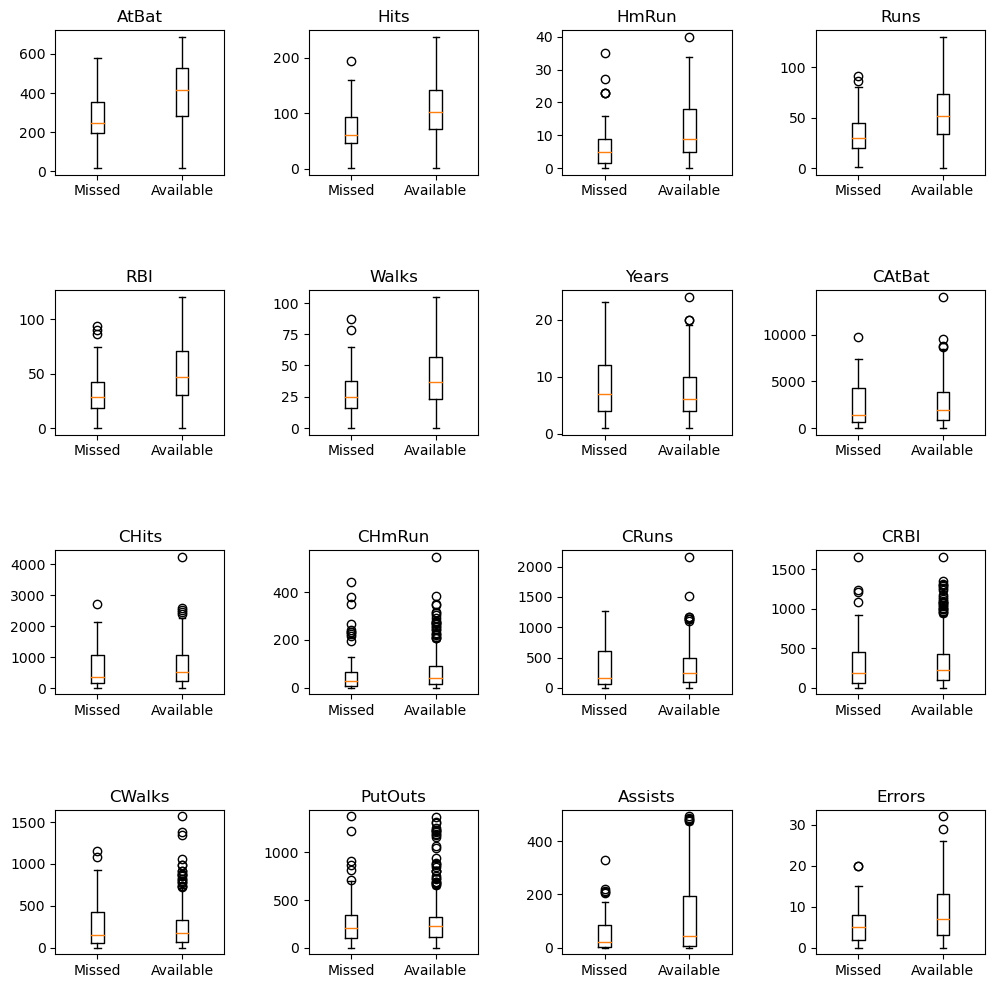

In [7]:
#Analysis of MVs
var_ind = list(range(1, 14)) + list(range(16, 19))
plot = plt.figure(figsize = (12, 12))
plot.subplots_adjust(hspace = 0.8, wspace = 0.5)
for i in range(1, 17):
    plt.subplot(4, 4, i)
    plt.boxplot([data.loc[data['is_salary_missed'] == True, data.columns[var_ind[i - 1]]],
                 data.loc[data['is_salary_missed'] == False, data.columns[var_ind[i - 1]]]])
    plt.title(data.columns[var_ind[i - 1]])
    plt.xticks(ticks = [1, 2], labels = ['Missed', 'Available'])

In [8]:
#MVs analysis from categorical variables perspective
for i in ['League', 'Division', 'NewLeague']:
    cross_tab_pct = round(pd.crosstab(data[i], 
                                      data['is_salary_missed'], 
                                      normalize = 'index'), 2)
    print('--- Cross tab of is_salary_missed vs. ' + i + ' ---')
    print(cross_tab_pct)

--- Cross tab of is_salary_missed vs. League ---
is_salary_missed  False  True 
League                        
A                  0.79   0.21
N                  0.84   0.16
--- Cross tab of is_salary_missed vs. Division ---
is_salary_missed  False  True 
Division                      
E                  0.82   0.18
W                  0.81   0.19
--- Cross tab of is_salary_missed vs. NewLeague ---
is_salary_missed  False  True 
NewLeague                     
A                  0.80   0.20
N                  0.84   0.16


In [9]:
#Remove records with MVs
data.dropna(subset = 'Salary', inplace = True)
np.sum(data.isnull())

Name                0
AtBat               0
Hits                0
HmRun               0
Runs                0
RBI                 0
Walks               0
Years               0
CAtBat              0
CHits               0
CHmRun              0
CRuns               0
CRBI                0
CWalks              0
League              0
Division            0
PutOuts             0
Assists             0
Errors              0
Salary              0
NewLeague           0
is_salary_missed    0
dtype: int64

In [10]:
#Remove is_salary_missed
data.drop(columns = 'is_salary_missed', inplace = True)
data.info()
#Note: sample size is small

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       263 non-null    object 
 1   AtBat      263 non-null    int64  
 2   Hits       263 non-null    int64  
 3   HmRun      263 non-null    int64  
 4   Runs       263 non-null    int64  
 5   RBI        263 non-null    int64  
 6   Walks      263 non-null    int64  
 7   Years      263 non-null    int64  
 8   CAtBat     263 non-null    int64  
 9   CHits      263 non-null    int64  
 10  CHmRun     263 non-null    int64  
 11  CRuns      263 non-null    int64  
 12  CRBI       263 non-null    int64  
 13  CWalks     263 non-null    int64  
 14  League     263 non-null    object 
 15  Division   263 non-null    object 
 16  PutOuts    263 non-null    int64  
 17  Assists    263 non-null    int64  
 18  Errors     263 non-null    int64  
 19  Salary     263 non-null    float64
 20  NewLeague 

#### 4: Univariate data analysis

In [11]:
#Check if there is duplicate rows
np.sum(data.duplicated())

0

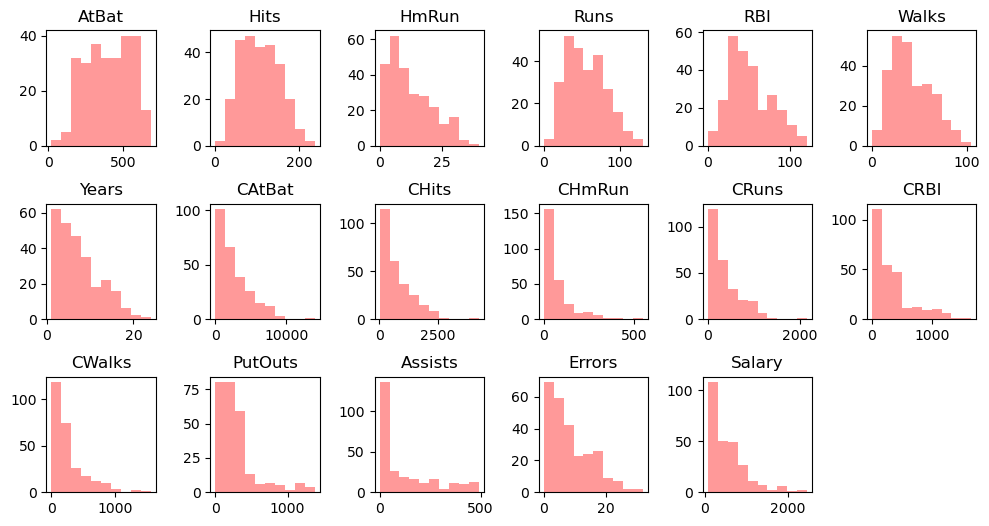

In [12]:
#Histogram of numeric variables
var_ind = list(range(1, 14)) + list(range(16, 20))
plt.figure(figsize = (12, 6))
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
for i in range(1, 18):
    plt.subplot(3, 6, i)
    plt.hist(x = data.iloc[: , var_ind[i - 1]], alpha = 0.4, color = 'red')
    plt.title(data.columns[var_ind[i - 1]])

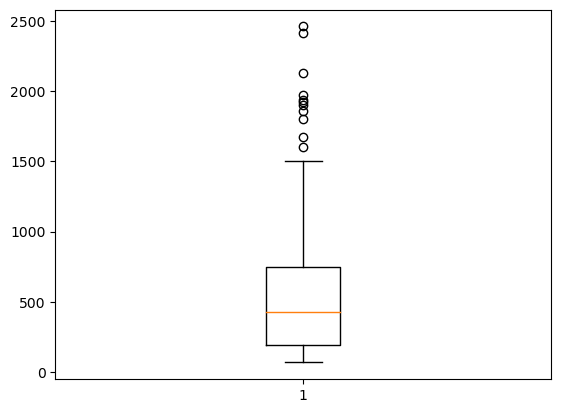

In [13]:
#Check for outliers
plt.boxplot(data['Salary'])
plt.show()

In [14]:
#Categorical variables
for i in ['League', 'Division', 'NewLeague']:
    print('--- Frequency Tabel of ' + i + ' ---')
    print(data[i].value_counts())

--- Frequency Tabel of League ---
A    139
N    124
Name: League, dtype: int64
--- Frequency Tabel of Division ---
W    134
E    129
Name: Division, dtype: int64
--- Frequency Tabel of NewLeague ---
A    141
N    122
Name: NewLeague, dtype: int64


#### 5: Bivariate data analysis

In [15]:
#Correlation analysis
corr_table = round(data.iloc[:, var_ind].corr(method = 'pearson'), 2)
corr_table

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
AtBat,1.00,0.96,0.56,0.90,0.80,0.62,0.01,0.21,0.23,0.21,0.24,0.22,0.13,0.31,0.34,0.33,0.39
Hits,0.96,1.00,0.53,0.91,0.79,0.59,0.02,0.21,0.24,0.19,0.24,0.22,0.12,0.30,0.30,0.28,0.44
HmRun,0.56,0.53,1.00,0.63,0.85,0.44,0.11,0.22,0.22,0.49,0.26,0.35,0.23,0.25,-0.16,-0.01,0.34
Runs,0.90,0.91,0.63,1.00,0.78,0.70,-0.01,0.17,0.19,0.23,0.24,0.20,0.16,0.27,0.18,0.19,0.42
RBI,0.80,0.79,0.85,0.78,1.00,0.57,0.13,0.28,0.29,0.44,0.31,0.39,0.23,0.31,0.06,0.15,0.45
Walks,0.62,0.59,0.44,0.70,0.57,1.00,0.13,0.27,0.27,0.35,0.33,0.31,0.43,0.28,0.10,0.08,0.44
Years,0.01,0.02,0.11,-0.01,0.13,0.13,1.00,0.92,0.90,0.72,0.88,0.86,0.84,-0.02,-0.09,-0.16,0.40
CAtBat,0.21,0.21,0.22,0.17,0.28,0.27,0.92,1.00,1.00,0.80,0.98,0.95,0.91,0.05,-0.01,-0.07,0.53
CHits,0.23,0.24,0.22,0.19,0.29,0.27,0.90,1.00,1.00,0.79,0.98,0.95,0.89,0.07,-0.01,-0.07,0.55
CHmRun,0.21,0.19,0.49,0.23,0.44,0.35,0.72,0.80,0.79,1.00,0.83,0.93,0.81,0.09,-0.19,-0.17,0.52


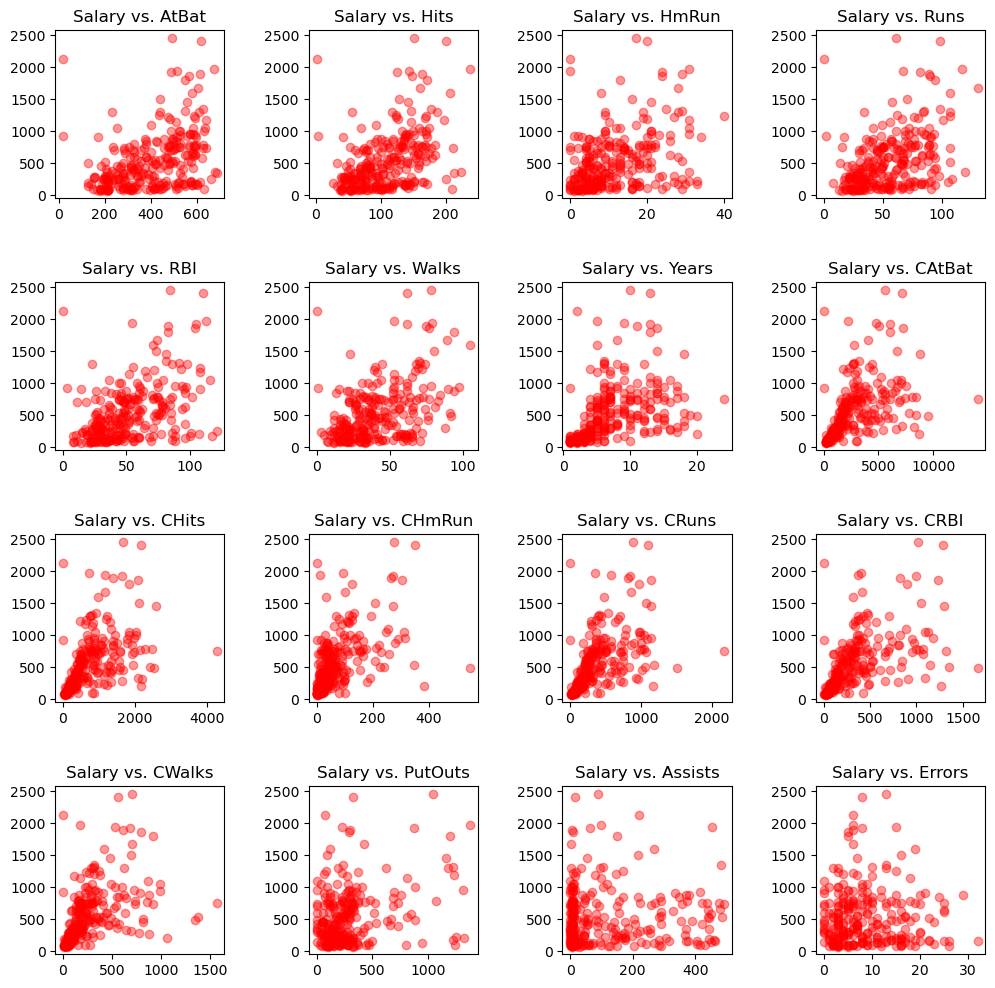

In [16]:
#Scatter plot
var_ind = list(range(1, 14)) + list(range(16, 19))
plt.figure(figsize = (12, 12))
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
for i in range(1, 17):
    plt.subplot(4, 4, i)
    plt.scatter(x = data.iloc[: , var_ind[i - 1]], y = data['Salary'], alpha = 0.4, color = 'red')
    plt.title('Salary vs. ' + data.columns[var_ind[i - 1]])

## Data Preparation

In [17]:
#Remove players' name
data.drop(columns = 'Name', inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64

## Build Predictive Models

In [18]:
#Split data into test and train
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size = 0.2, random_state = 1234)
print(train.shape)
print(test.shape)

(210, 20)
(53, 20)


In [19]:
#Note: sklearn decision trees do not handle categorical data
#Possible solutions:
#Integer encoding for ordinal variables
#One-hot encoding for nominal variables
#Create dummy variables for categorical variables
dummy_vars = pd.get_dummies(train[['League', 'Division', 'NewLeague']])
dummy_vars.drop(columns = ['League_A', 'Division_E', 'NewLeague_A'], inplace = True)
dummy_vars.head()

,League_N,Division_W,NewLeague_N
98,1,1,1
206,1,1,1
54,0,0,0
177,0,0,0
27,1,1,1


In [20]:
#Define feature matrix 
X_train = train.drop(columns = ['Salary', 'League', 'Division', 'NewLeague'])
X_train = pd.concat([X_train, dummy_vars], axis = 1)
X_train.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
98,415,115,27,97,71,68,3,711,184,45,156,119,99,274,2,7,1,1,1
206,407,93,8,47,30,30,2,969,230,14,121,69,68,172,317,25,1,1,1
54,403,101,12,45,53,39,12,5150,1429,166,747,666,526,316,6,5,0,0,0
177,441,118,28,84,86,68,8,2723,750,126,433,420,309,190,2,2,0,0,0
27,474,129,10,50,56,40,10,2331,604,61,246,327,166,732,83,13,1,1,1


In [21]:
#Define response matrix
y_train = train['Salary']
y_train

98      300.0
206     150.0
54      675.0
177    1300.0
27      750.0
        ...  
183     125.0
192     525.0
256     400.0
72      850.0
263     740.0
Name: Salary, Length: 210, dtype: float64

In [22]:
#Box-Cox transformation
from sklearn.preprocessing import PowerTransformer
boxcox = PowerTransformer(method = 'box-cox')
boxcox.fit(y_train.values.reshape(-1, 1))
trans_y_train = boxcox.fit_transform(y_train.values.reshape(-1, 1))

### Decision Tree

In [23]:
#Decision Tree - model 1
from sklearn.tree import DecisionTreeRegressor
#Post prunning approach
tree_reg = DecisionTreeRegressor(criterion = 'squared_error',
                                 max_depth = 10, 
                                 min_samples_leaf = 5, 
                                 ccp_alpha = 0)
model_1 = tree_reg.fit(X_train, trans_y_train)

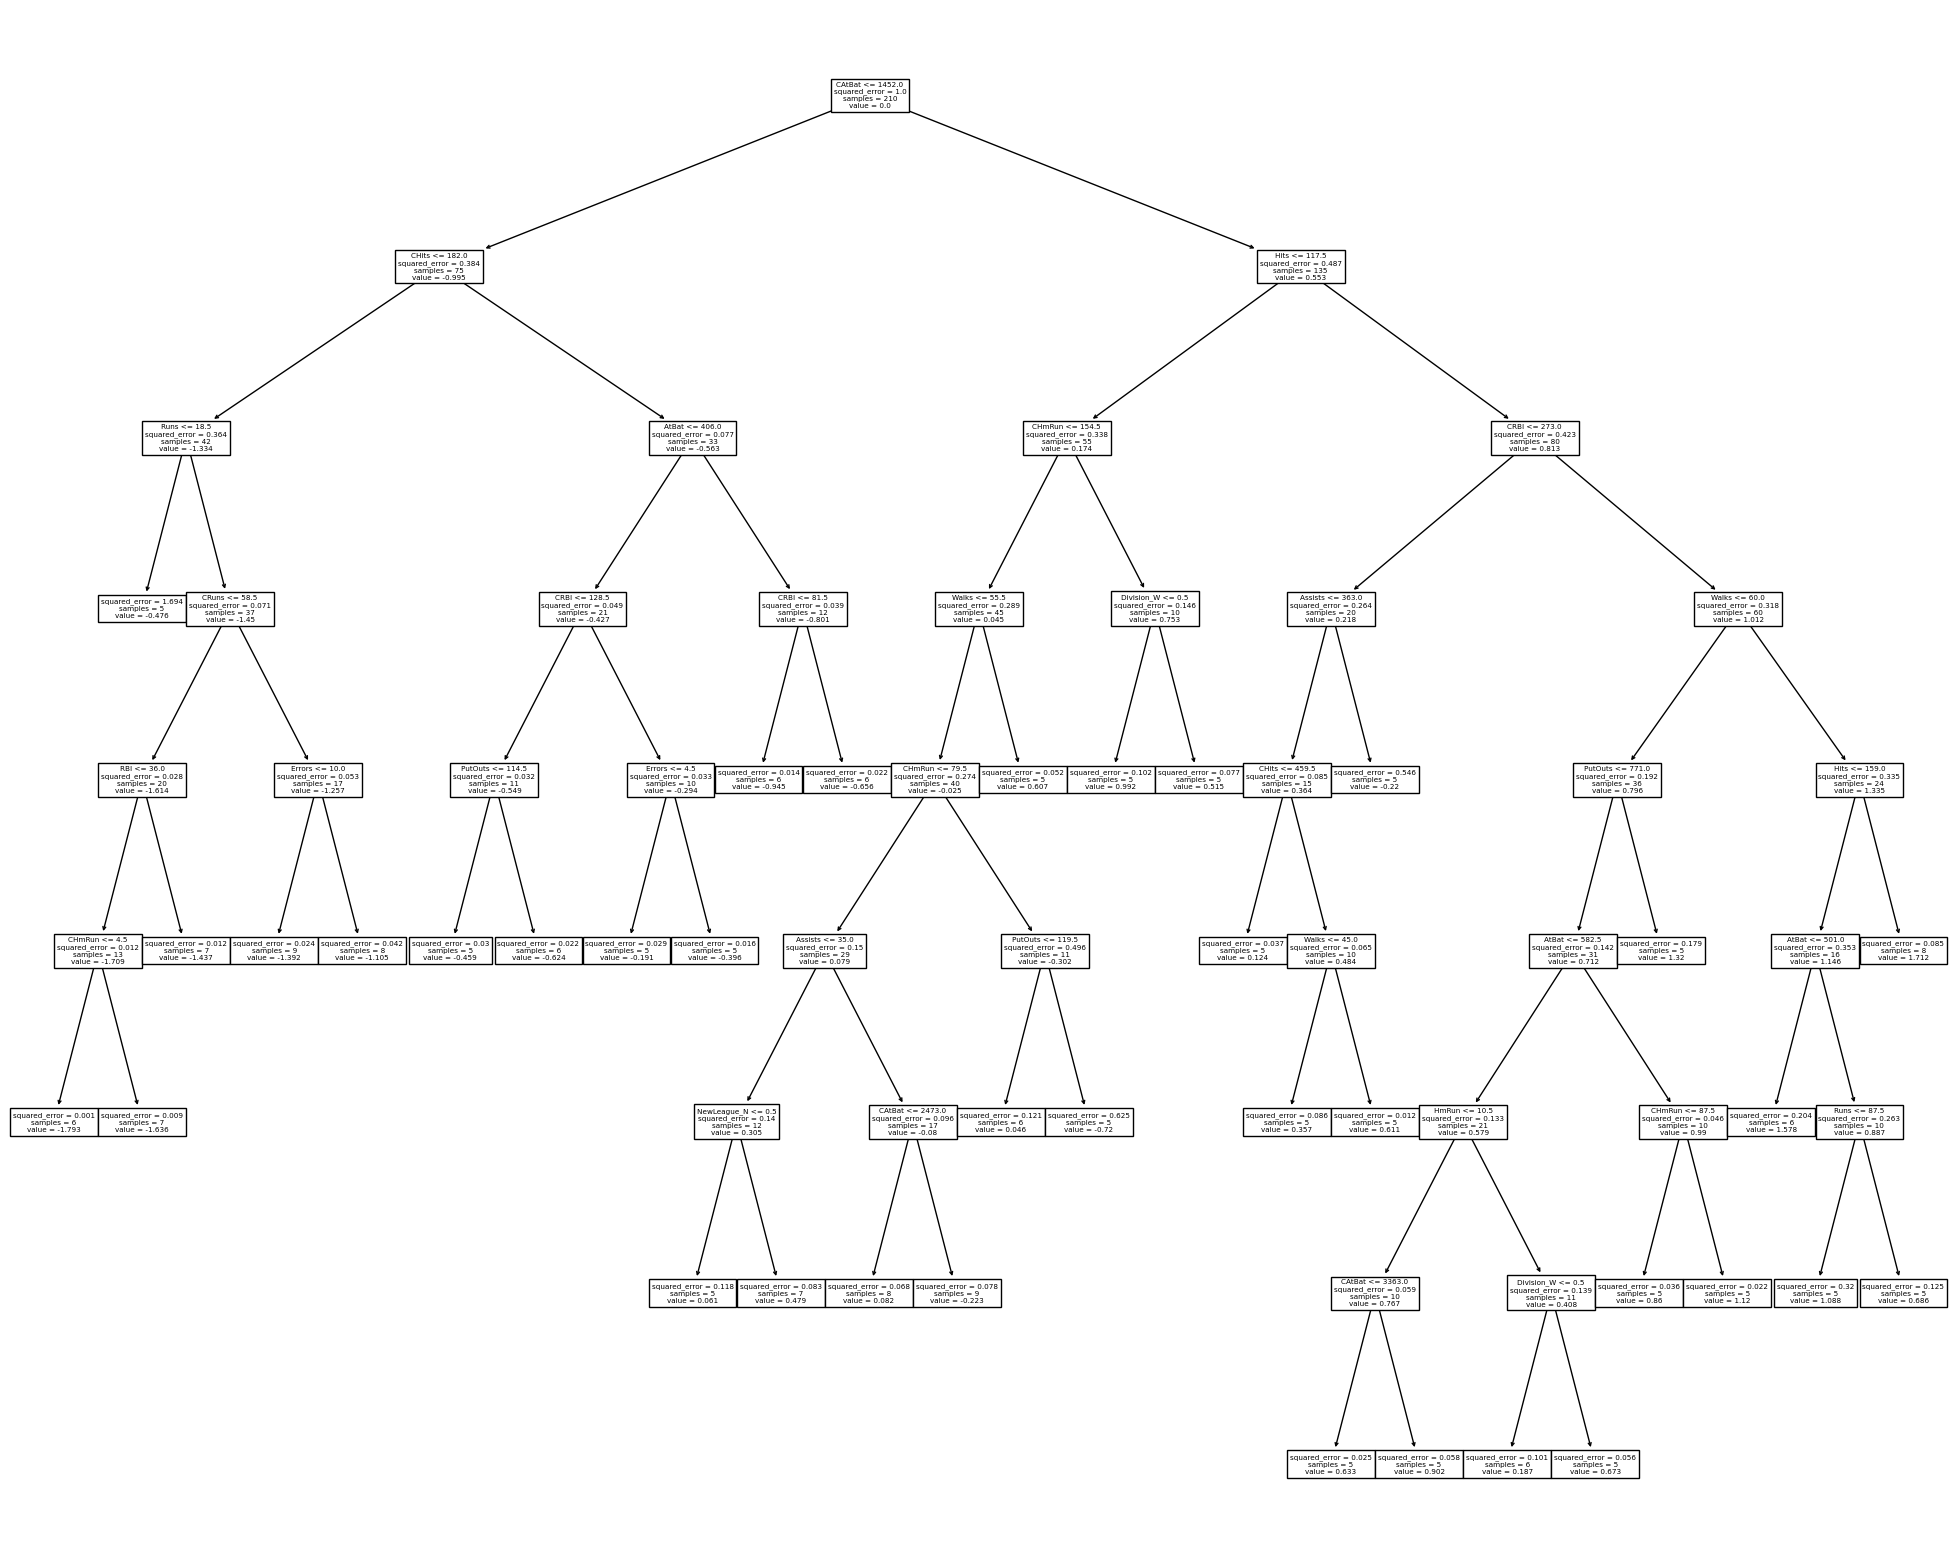

In [24]:
#Plot the Tree
from sklearn.tree import plot_tree
fig = plt.figure(figsize = (25, 20))
plot_tree(model_1, feature_names = X_train.columns)
plt.show()

In [25]:
#Post prunning
prunning_path = model_1.cost_complexity_pruning_path(X_train, trans_y_train)
prunning_path

{'ccp_alphas': array([0.00000000e+00, 3.55312381e-04, 3.82362532e-04, 4.98719617e-04,
        7.63847525e-04, 8.05424665e-04, 8.62695055e-04, 1.19640057e-03,
        1.59370211e-03, 1.62931253e-03, 1.66660647e-03, 1.88044471e-03,
        1.92736334e-03, 2.05492821e-03, 2.42794631e-03, 2.70499773e-03,
        3.07034888e-03, 3.22408095e-03, 4.94675704e-03, 5.06501896e-03,
        5.44093418e-03, 5.56798056e-03, 6.09425018e-03, 6.57014840e-03,
        7.57945344e-03, 8.33852877e-03, 8.47284517e-03, 1.95538065e-02,
        1.98965070e-02, 1.99162703e-02, 4.49990175e-02, 5.22578414e-02,
        6.34714054e-02, 5.49717750e-01]),
 'impurities': array([0.13015831, 0.13051363, 0.13089599, 0.13139471, 0.13215856,
        0.13296398, 0.13382668, 0.13502308, 0.13661678, 0.13824609,
        0.1399127 , 0.14179314, 0.14372051, 0.14577543, 0.14820338,
        0.15090838, 0.15397873, 0.15720281, 0.16214956, 0.16721458,
        0.17265552, 0.1782235 , 0.18431775, 0.19745805, 0.2050375 ,
        0.2217

In [26]:
#Grid
alpha_grid = prunning_path['ccp_alphas']
alpha_grid

array([0.00000000e+00, 3.55312381e-04, 3.82362532e-04, 4.98719617e-04,
       7.63847525e-04, 8.05424665e-04, 8.62695055e-04, 1.19640057e-03,
       1.59370211e-03, 1.62931253e-03, 1.66660647e-03, 1.88044471e-03,
       1.92736334e-03, 2.05492821e-03, 2.42794631e-03, 2.70499773e-03,
       3.07034888e-03, 3.22408095e-03, 4.94675704e-03, 5.06501896e-03,
       5.44093418e-03, 5.56798056e-03, 6.09425018e-03, 6.57014840e-03,
       7.57945344e-03, 8.33852877e-03, 8.47284517e-03, 1.95538065e-02,
       1.98965070e-02, 1.99162703e-02, 4.49990175e-02, 5.22578414e-02,
       6.34714054e-02, 5.49717750e-01])

In [27]:
#K-fold cross validation to choose the best model
from sklearn.model_selection import cross_val_score

cv_errors = np.zeros(shape = len(alpha_grid)) #to save cv results

for i in range(len(alpha_grid)):
    tree_reg = DecisionTreeRegressor(criterion = 'squared_error',
                                 max_depth = 10, 
                                 min_samples_leaf = 5, 
                                 ccp_alpha = alpha_grid[i])
    scores = cross_val_score(estimator = tree_reg, 
                             X = X_train, 
                             y = trans_y_train,
                             scoring = 'neg_root_mean_squared_error',
                             cv = 5, n_jobs = -1)
    cv_errors[i] = scores.mean() 
#To check scoring: 
#https://scikit-learn.org/stable/modules/model_evaluation.html

cv_errors

array([-0.68663302, -0.68881302, -0.68565205, -0.68747719, -0.68572895,
       -0.68726625, -0.68572895, -0.68688546, -0.68521648, -0.68535238,
       -0.68652627, -0.68030712, -0.68087205, -0.68262237, -0.68296998,
       -0.68142275, -0.68306238, -0.68215705, -0.6668802 , -0.66358527,
       -0.66111465, -0.66111465, -0.66652843, -0.65554923, -0.65773881,
       -0.66229143, -0.66509849, -0.64377478, -0.64377478, -0.64377478,
       -0.63297599, -0.65280042, -0.68169034, -0.84118183])

In [28]:
#Best alpha
best_alpha = alpha_grid[np.argmax(cv_errors)]
best_alpha

0.04499901754430957

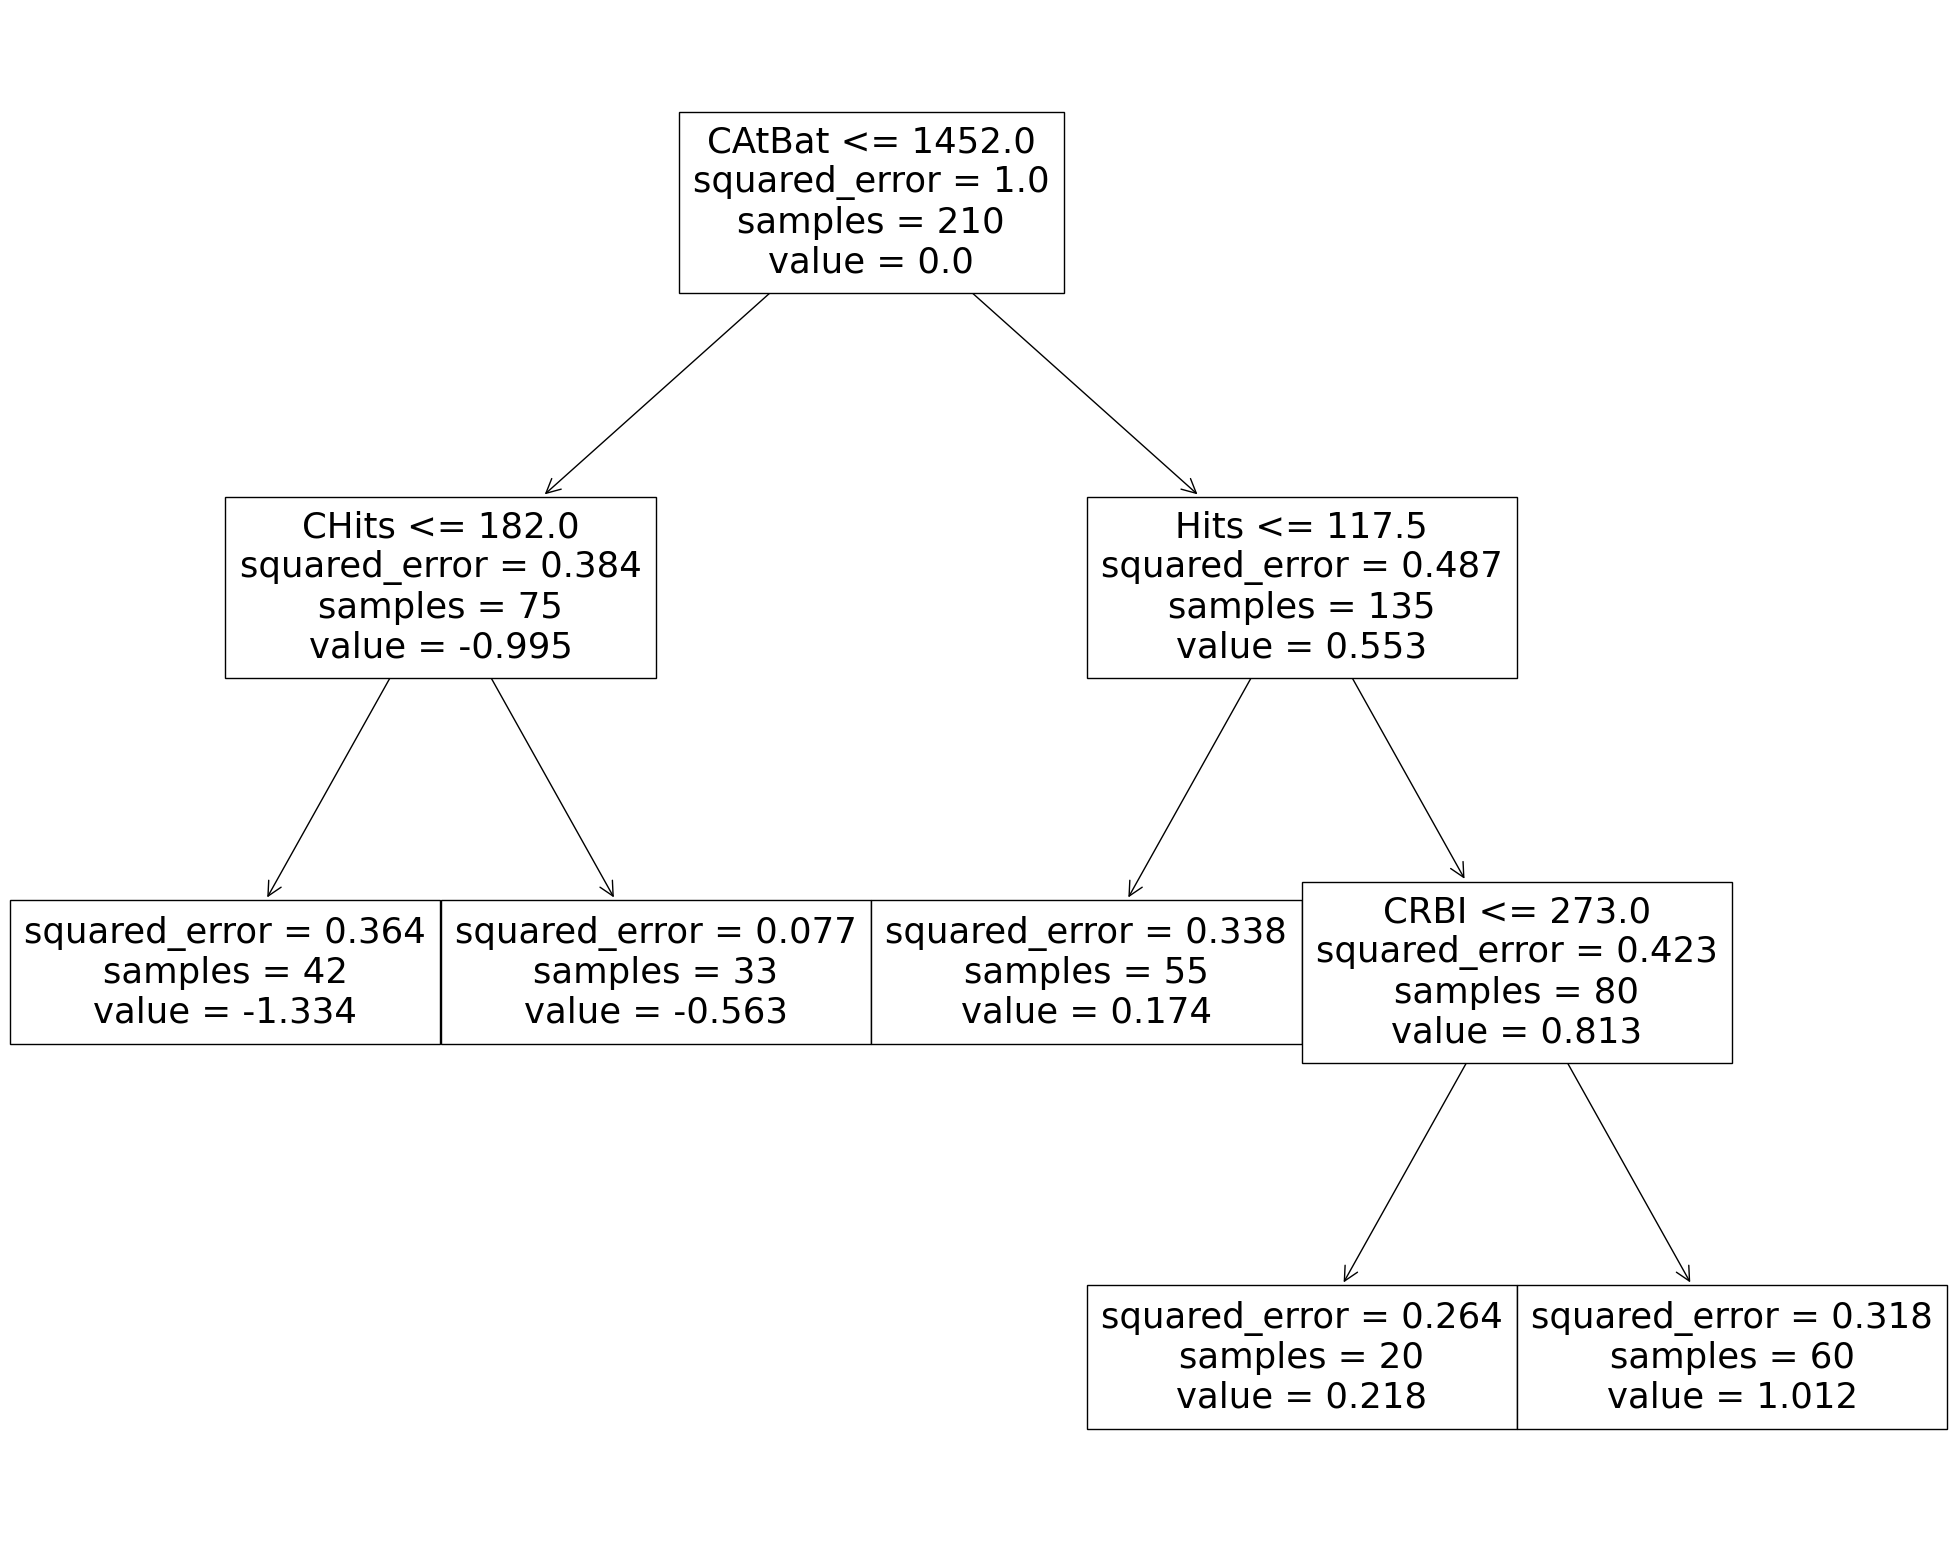

In [29]:
#Best model
tree_reg = DecisionTreeRegressor(criterion = 'squared_error',
                                 max_depth = 10, 
                                 min_samples_leaf = 5, 
                                 ccp_alpha = best_alpha)
model_1 = tree_reg.fit(X_train, trans_y_train)
#Plot the Tree
from sklearn.tree import plot_tree
fig = plt.figure(figsize = (25, 20))
plot_tree(model_1, feature_names = X_train.columns)
plt.show()

In [30]:
#Predict on test - model 1
#Create dummy variables for categorical variables
dummy_vars = pd.get_dummies(test[['League', 'Division', 'NewLeague']])
dummy_vars.drop(columns = ['League_A', 'Division_E', 'NewLeague_A'], inplace = True)

#Define feature matrix 
X_test = test.drop(['Salary', 'League', 'Division', 'NewLeague'], axis = 1)
X_test = pd.concat([X_test, dummy_vars], axis = 1)

#Prediction using model 1
pred_tree = model_1.predict(X_test)
pred_tree = pd.Series(boxcox.inverse_transform(pred_tree.reshape(-1, 1)).reshape(-1), index = test.index)
pred_tree

295    117.044260
132    485.101388
137    485.101388
268    117.044260
239    117.044260
128    961.312070
189    961.312070
209    250.695351
276    250.695351
236    485.101388
227    250.695351
320    961.312070
215    250.695351
178    961.312070
121    485.101388
265    117.044260
45     250.695351
274    250.695351
40     117.044260
244    117.044260
198    250.695351
303    485.101388
7      117.044260
78     485.101388
96     961.312070
68     250.695351
223    485.101388
35     485.101388
93     117.044260
130    485.101388
311    485.101388
6      117.044260
131    250.695351
63     250.695351
205    117.044260
89     250.695351
293    961.312070
314    117.044260
8      117.044260
10     961.312070
88     485.101388
85     485.101388
124    961.312070
185    961.312070
262    250.695351
43     117.044260
162    117.044260
214    485.101388
301    250.695351
70     485.101388
226    250.695351
271    961.312070
195    485.101388
dtype: float64

In [31]:
#Absolute error
abs_err_tree = abs(test['Salary'] - pred_tree)

#Absolute error mean, median, sd, IQR, max, min
from scipy.stats import iqr
models_comp = pd.DataFrame({'Mean of AbsErrors':    abs_err_tree.mean(),
                            'Median of AbsErrors' : abs_err_tree.median(),
                            'SD of AbsErrors' :     abs_err_tree.std(),
                            'IQR of AbsErrors':     iqr(abs_err_tree),
                            'Min of AbsErrors':     abs_err_tree.min(),
                            'Max of AbsErrors':     abs_err_tree.max()}, 
                           index = ['Decision Tree'])
models_comp

,Mean of AbsErrors,Median of AbsErrors,SD of AbsErrors,IQR of AbsErrors,Min of AbsErrors,Max of AbsErrors
Decision Tree,151.404889,75.695351,176.801245,182.260389,1.31207,900.14793


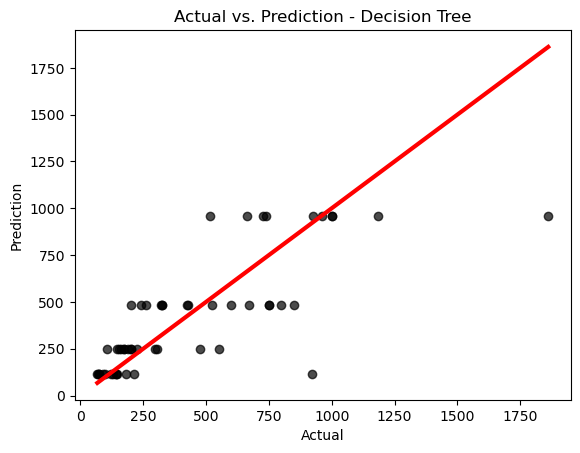

In [32]:
#Actual vs. Prediction
plt.scatter(x = test['Salary'], y = pred_tree, c = 'black', alpha = 0.7)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Prediction - Decision Tree')

#Add 45 degree line
xp = np.linspace(test['Salary'].min(), test['Salary'].max(), 100)
plt.plot(xp, xp, c = 'red', linewidth = 3)
plt.show()

### Random Forest

In [33]:
#Sample Random Forest model (not tuned)
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators = 200,
                               max_features = 4, 
                               criterion = 'squared_error',
                               max_depth = 10, 
                               min_samples_leaf = 5, 
                               ccp_alpha = 0,
                               random_state = 123)
model_2 = rf_reg.fit(X_train, trans_y_train.reshape(-1))

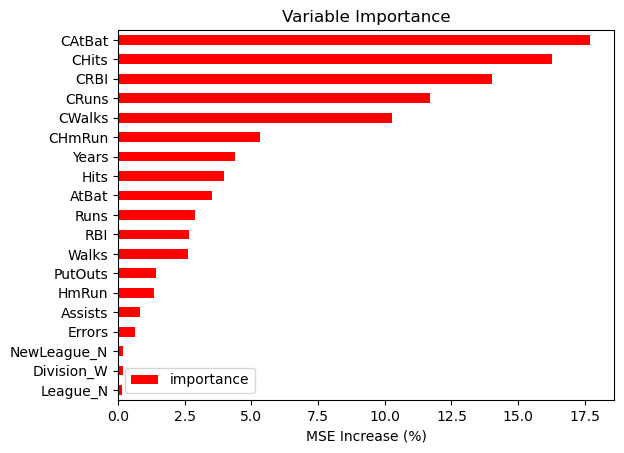

In [34]:
#Calculate variable importance
importance = pd.DataFrame({'importance':model_2.feature_importances_ * 100}, 
                          index = X_train.columns)
importance.sort_values(by = 'importance', axis = 0, ascending = True).plot(kind = 'barh', color = 'r')
plt.title('Variable Importance')
plt.xlabel('MSE Increase (%)')
plt.show()

In [35]:
#Create hyper-parameters grid
import itertools
n_estimators = [100, 200, 500]
max_features = ['sqrt', 'log2', None] #If None or 1.0, then max_features = n_features
max_depth = [2, 5, 10]
min_samples_leaf = [5, 10, 15]
params_grid = list(itertools.product(n_estimators, max_features, max_depth, min_samples_leaf))
params_grid = pd.DataFrame(data = params_grid,
                           index = range(1, 82), 
                           columns = ['n_estimators', 'max_features', 'max_depth', 'min_samples_leaf'])
params_grid

,n_estimators,max_features,max_depth,min_samples_leaf
1,100,sqrt,2,5
2,100,sqrt,2,10
3,100,sqrt,2,15
4,100,sqrt,5,5
5,100,sqrt,5,10
...,...,...,...,...
77,500,None,5,10
78,500,None,5,15
79,500,None,10,5
80,500,None,10,10


In [38]:
#K-fold cross validation to choose the best model
from sklearn.model_selection import cross_val_score

import time #to measure the processing time
start_time = time.time()
cv_errors = np.zeros(shape = len(params_grid)) #to save cv results
for i in range(len(params_grid)):
    rf_reg = RandomForestRegressor(n_estimators = params_grid.iloc[i, 0],
                                   max_features = params_grid.iloc[i, 1], 
                                   criterion = 'squared_error',
                                   max_depth = params_grid.iloc[i, 2], 
                                   min_samples_leaf = params_grid.iloc[i, 3], 
                                   ccp_alpha = 0)
    scores = cross_val_score(estimator = rf_reg, 
                             X = X_train, 
                             y = trans_y_train,
                             scoring = 'neg_root_mean_squared_error',
                             cv = 5, n_jobs = -1)
    cv_errors[i] = scores.mean() 
#To check scoring: 
#https://scikit-learn.org/stable/modules/model_evaluation.html
end_time = time.time()
print('The Processing time is: ', end_time - start_time, 'seconds')

cv_errors

The Processing time is:  157.9356837272644 seconds


array([-0.57681874, -0.57887232, -0.57467913, -0.55797283, -0.55620028,
       -0.55883019, -0.55486205, -0.55882455, -0.56060442, -0.58300585,
       -0.57735481, -0.57545114, -0.55907997, -0.55708488, -0.56446109,
       -0.56582967, -0.55685512, -0.5642475 , -0.58984331, -0.58657702,
       -0.5858897 , -0.57306297, -0.56601678, -0.57012466, -0.57268212,
       -0.56696428, -0.56996208, -0.58149054, -0.57824287, -0.57291878,
       -0.55744735, -0.56172625, -0.56326297, -0.55967541, -0.55900111,
       -0.56050431, -0.58212444, -0.57735229, -0.57668955, -0.56008262,
       -0.5566833 , -0.56195687, -0.56155414, -0.55922448, -0.56074102,
       -0.58740541, -0.58422621, -0.58324035, -0.57524663, -0.56663149,
       -0.56704445, -0.56973955, -0.5661369 , -0.56524158, -0.58031653,
       -0.57761925, -0.5763858 , -0.55766941, -0.55577231, -0.56252184,
       -0.5591544 , -0.55785435, -0.56210175, -0.58025622, -0.57976451,
       -0.57506625, -0.55856888, -0.55772464, -0.56305476, -0.55

In [39]:
#Best model
params_grid.iloc[np.argmax(cv_errors), :]

n_estimators         100
max_features        sqrt
max_depth             10
min_samples_leaf       5
Name: 7, dtype: object

In [40]:
#Train model 2
rf_reg = RandomForestRegressor(n_estimators = params_grid.iloc[np.argmax(cv_errors), 0],
                               max_features = params_grid.iloc[np.argmax(cv_errors), 1], 
                               criterion = 'squared_error',
                               max_depth = params_grid.iloc[np.argmax(cv_errors), 2], 
                               min_samples_leaf = params_grid.iloc[np.argmax(cv_errors), 3], 
                               ccp_alpha = 0,
                               random_state = 123)
model_2 = rf_reg.fit(X_train, trans_y_train.reshape(-1))

#Prediction using model 2
pred_rf = model_2.predict(X_test)
pred_rf = pd.Series(boxcox.inverse_transform(pred_rf.reshape(-1, 1)).reshape(-1), index = test.index)
pred_rf

295     148.640524
132     548.102534
137     532.662091
268     132.043322
239     127.800530
128     733.246102
189     975.214808
209     359.094872
276     198.755756
236     579.430375
227     227.120426
320     944.154182
215     269.209108
178     814.989704
121     708.633451
265     153.087943
45      271.838685
274     212.287260
40      126.902529
244     200.060332
198     206.490375
303     452.164604
7       130.567294
78      540.028202
96     1169.587787
68      228.813299
223     351.575547
35      698.490224
93      185.144354
130     561.544370
311     491.572125
6       151.157894
131     306.844983
63      246.054859
205     105.078657
89      291.188537
293     735.281372
314     115.592831
8       119.946435
10      862.572368
88      583.146317
85      662.062518
124     676.492045
185     734.597526
262     286.496639
43      172.718248
162     137.902992
214     520.049202
301     254.520172
70      576.069433
226     199.221354
271     961.205056
195     719.

In [41]:
#Absolute error
abs_err_rf = abs(test['Salary'] - pred_rf)

#Absolute error mean, median, sd, IQR, max, min
from scipy.stats import iqr
models_comp = pd.concat([models_comp,
                         pd.DataFrame({'Mean of AbsErrors':    abs_err_rf.mean(),
                                       'Median of AbsErrors' : abs_err_rf.median(),
                                       'SD of AbsErrors' :     abs_err_rf.std(),
                                       'IQR of AbsErrors':     iqr(abs_err_rf),
                                       'Min of AbsErrors':     abs_err_rf.min(),
                                       'Max of AbsErrors':     abs_err_rf.max()}, 
                                      index = ['Random Forest'])])
models_comp

,Mean of AbsErrors,Median of AbsErrors,SD of AbsErrors,IQR of AbsErrors,Min of AbsErrors,Max of AbsErrors
Decision Tree,151.404889,75.695351,176.801245,182.260389,1.31207,900.147930
Random Forest,124.349919,62.902992,158.611693,156.691037,2.19947,771.359476


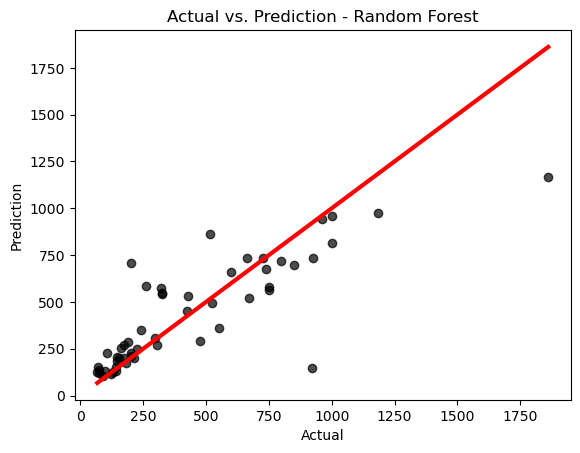

In [42]:
#Actual vs. Prediction
plt.scatter(x = test['Salary'], y = pred_rf, c = 'black', alpha = 0.7)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Prediction - Random Forest')

#Add 45 degree line
xp = np.linspace(test['Salary'].min(), test['Salary'].max(), 100)
plt.plot(xp, xp, c = 'red', linewidth = 3)
plt.show()